In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [15]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)


In [25]:
data = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\Ayush\round2\round-2-island-data-bottle\prices_round_2_day_-1.csv', sep=';')
data_0 = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\Ayush\round2\round-2-island-data-bottle\prices_round_2_day_0.csv', sep=';')
data_0['timestamp'] += 1e6

data_1 = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\Ayush\round2\round-2-island-data-bottle\prices_round_2_day_1.csv', sep=';')
data_1['timestamp'] += 2e6

data_total = pd.concat([data, data_0, data_1], axis=0)
print(data.shape)

(10001, 8)


In [24]:
data_total.head()
# print(data_total.shape)

timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF   SUNLIGHT  HUMIDITY  DAY
0          0  1200.00             1.5           10.5           -2.0  2500.0000  79.00000   -1
1        100  1201.75             1.5            9.5           -2.0  2499.4197  79.00410   -1
2        200  1201.75             1.5            9.5           -2.0  2498.8457  79.00821   -1
3        300  1201.75             1.5            9.5           -2.0  2498.2780  79.01234   -1
4        400  1201.75             1.5            9.5           -2.0  2497.7166  79.01649   -1

In [44]:
import plotly.graph_objects as go
def plot_sunlight_humidity_orchids(data):
    fig = go.Figure()

    # Add SUNLIGHT trace
    fig.add_trace(go.Scatter(x=data['timestamp'], y=data['SUNLIGHT'], name='SUNLIGHT', yaxis='y'))

    # Add HUMIDITY trace
    fig.add_trace(go.Scatter(x=data['timestamp'], y=data['HUMIDITY'], name='HUMIDITY', yaxis= 'y2'))

    # Add ORCHIDS trace
    fig.add_trace(go.Scatter(x=data['timestamp'], y=data['ORCHIDS'], name='ORCHIDS', yaxis='y3'))

    # Add export target trace   
    fig.add_trace(go.Scatter(x=data['timestamp'], y=data['EXPORT_TARIFF'], name='EXPORT_TARIFF', yaxis='y4'))

    fig.add_trace(go.Scatter(x=data['timestamp'], y=data['IMPORT_TARIFF'], name='IMPORT_TARIFF', yaxis='y5'))

    # Update layout
    fig.update_layout(title='Sunlight, Humidity, and Orchids',
                    xaxis_title='Timestamp',
                    yaxis=dict(title='SUNLIGHT', side='left'),
                    yaxis2=dict(title='HUMIDITY', side='right', overlaying='y'),
                    yaxis4=dict(title='EXPORT_TARIFF', side='right', overlaying='y', anchor='x', position=0.95),
                    yaxis5=dict(title='IMPORT_TARIFF', side='right', overlaying='y', anchor='x', position=0.85),
                    yaxis3=dict(title='ORCHIDS', side='right', overlaying='y', anchor='free', position=0.95))

    # Show the plot
    fig.show()

plot_sunlight_humidity_orchids(data)



In [26]:
plot_sunlight_humidity_orchids(data_total)

In [43]:
print(data_total['SUNLIGHT'].corr(data_total['ORCHIDS']))
print(data_total['HUMIDITY'].corr(data_total['ORCHIDS']))
print(data_total['SUNLIGHT'].corr(data_total['HUMIDITY']))
print(data_total['ORCHIDS'].corr(data_total['EXPORT_TARIFF']))
print(data_total['ORCHIDS'].corr(data_total['IMPORT_TARIFF']))

0.7156920789197557
0.7100657475704436
0.6229360576210401
0.22204610805435662
0.36460716147809485


In [ ]:
def compute_orders_c_and_pc(self, order_depth):
        orders = {'COCONUTS' : [], 'PINA_COLADAS' : []}
        prods = ['COCONUTS', 'PINA_COLADAS']
        coef = 1.875
        osell, obuy, best_sell, best_buy, worst_sell, worst_buy, mid_price, vol_buy, vol_sell = {}, {}, {}, {}, {}, {}, {}, {}, {}
        for p in prods:
            osell[p] = collections.OrderedDict(sorted(order_depth[p].sell_orders.items()))
            obuy[p] = collections.OrderedDict(sorted(order_depth[p].buy_orders.items(), reverse=True))

            best_sell[p] = next(iter(osell[p]))
            best_buy[p] = next(iter(obuy[p]))

            worst_sell[p] = next(reversed(osell[p]))
            worst_buy[p] = next(reversed(obuy[p]))

            mid_price[p] = (best_sell[p] + best_buy[p])/2
            vol_buy[p], vol_sell[p] = 0, 0
            for price, vol in obuy[p].items():
                vol_buy[p] += vol 
                if vol_buy[p] >= self.POSITION_LIMIT[p]/10:
                    break
            for price, vol in osell[p].items():
                vol_sell[p] += -vol 
                if vol_sell[p] >= self.POSITION_LIMIT[p]/10:
                    break

        res = mid_price['PINA_COLADAS'] - coef*mid_price['COCONUTS']
        # print(f'Residual std: {self.std}')
        trade_at = self.std*1
        close_at = self.std*(-0.5)

        coco_pos = self.position['COCONUTS']
        coco_neg = self.position['COCONUTS']
        put_order = 0

        if res > trade_at:
            vol = self.position['PINA_COLADAS'] + self.POSITION_LIMIT['PINA_COLADAS']
            assert(vol >= 0)
            if vol > 0:
                orders['PINA_COLADAS'].append(Order('PINA_COLADAS', worst_buy['PINA_COLADAS'], -vol))
        elif res < -trade_at:
            vol = self.POSITION_LIMIT['PINA_COLADAS'] - self.position['PINA_COLADAS']
            assert(vol >= 0)
            if vol > 0:
                orders['PINA_COLADAS'].append(Order('PINA_COLADAS', worst_sell['PINA_COLADAS'], vol))
        elif res < close_at and self.position['PINA_COLADAS'] < 0:
            vol = -self.position['PINA_COLADAS']
            assert(vol >= 0)
            if vol > 0:
                orders['PINA_COLADAS'].append(Order('PINA_COLADAS', worst_sell['PINA_COLADAS'], vol))
        elif res > -close_at and self.position['PINA_COLADAS'] > 0:
            vol = self.position['PINA_COLADAS']
            assert(vol >= 0)
            if vol > 0:
                orders['PINA_COLADAS'].append(Order('PINA_COLADAS', worst_buy['PINA_COLADAS'], -vol))

        return orders

In [28]:
import talib

In [29]:
data['ema'] = talib.EMA(data['ORCHIDS'], timeperiod=100)

In [34]:
# data.head(-4)

In [39]:
fig = go.Figure()

# Add SUNLIGHT trace
fig.add_trace(go.Scatter(x=data['timestamp'], y=data['SUNLIGHT'], name='SUNLIGHT', yaxis='y'))

# Add HUMIDITY trace
fig.add_trace(go.Scatter(x=data['timestamp'], y=data['HUMIDITY'], name='HUMIDITY', yaxis= 'y2'))

# Add ORCHIDS trace
fig.add_trace(go.Scatter(x=data['timestamp'], y=data['ORCHIDS'], name='ORCHIDS', yaxis='y3'))
fig.add_trace(go.Scatter(x=data['timestamp'], y=data['ema'], name='EMA', yaxis='y3'))


# Update layout
fig.update_layout(title='Sunlight, Humidity, and Orchids',
                xaxis_title='Timestamp',
                yaxis=dict(title='SUNLIGHT', side='left'),
                yaxis2=dict(title='HUMIDITY', side='right', overlaying='y'),
                yaxis3=dict(title='ORCHIDS', side='right', overlaying='y', anchor='free', position=0.95
                            ))

# Show the plot
fig.show()

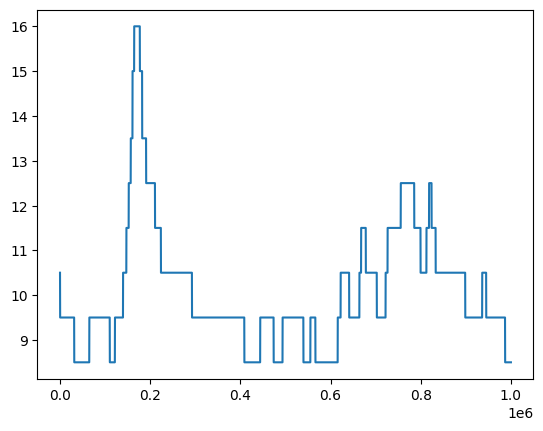

In [40]:
plt.plot(data['timestamp'], data['EXPORT_TARIFF'])

In [ ]:


def calc_next_price_starfruit(self):
        coeff = [0.18895127, 0.20771801, 0.26114406, 0.34171985]
        intercept = 2.3552758852292754
        nxt_price = intercept
        for i, val in enumerate(self.starfruit_cache):
            nxt_price += val * coeff[i]
        return int(round(nxt_price))


def compute_orders_sf(self, order_depth, acc_bid, acc_ask):
        STARFRUIT_POS_LIMIT = 20
        orders: list[Order] = []

        sell_orders = list(order_depth.sell_orders.items())
        buy_orders = list(order_depth.buy_orders.items())
        best_ask, best_ask_amount = sell_orders[0]
        best_bid, best_bid_amount = buy_orders[0]

        curr_pos = self.position["STARFRUIT"]

        for ask, vol in sell_orders:
            if ((ask <= acc_bid) or ((self.position["STARFRUIT"] < 0) and (ask == acc_bid + 1))) and curr_pos < STARFRUIT_POS_LIMIT: ## Try adding (self.position[product]<0) and (ask == acc_bid+1) to the condition
                order_for = min(-vol, STARFRUIT_POS_LIMIT - curr_pos)
                curr_pos += order_for
                assert(order_for >= 0)
                orders.append(Order("STARFRUIT", ask, order_for))

        if best_bid + 1 <= acc_bid:
            if curr_pos < STARFRUIT_POS_LIMIT:
                num = STARFRUIT_POS_LIMIT - curr_pos
                orders.append(Order("STARFRUIT", best_bid + 1, num))
                curr_pos += num


        curr_pos = self.position["STARFRUIT"]

        for bid, vol in buy_orders:
            if ((bid >= acc_ask) or ((self.position["STARFRUIT"] > 0) and (bid == acc_ask - 1))) and curr_pos > -STARFRUIT_POS_LIMIT: ## Try adding (self.position[product]>0) and (bid == acc_ask-1) to the condition
                order_for = max(-vol, -STARFRUIT_POS_LIMIT-curr_pos)
                curr_pos += order_for
                assert(order_for <= 0)
                orders.append(Order("STARFRUIT", bid, order_for))

        if best_ask - 1 >= acc_ask:
            if curr_pos > -STARFRUIT_POS_LIMIT:
                num = -STARFRUIT_POS_LIMIT-curr_pos
                orders.append(Order("STARFRUIT", best_ask - 1, num))
                curr_pos += num

        return orders